# Library

In [1]:
pip install pyvi

     |████████████████████████████████| 8.5 MB 5.4 MB/s 
     |████████████████████████████████| 743 kB 36.5 MB/s 


# MISC

In [2]:
import pandas as pd
from pyvi.ViTokenizer import ViTokenizer
# statistic dataset

TRAIN = 'drive/MyDrive/CODE/ViSocial/dataset/ctsd/UIT-ViCTSD_train.csv'
TRAIN_AUG = 'drive/MyDrive/CODE/ViSocial/dataset/ctsd/aug/train_augmented_dataset.csv'
DEV = 'drive/MyDrive/CODE/ViSocial/dataset/ctsd/UIT-ViCTSD_valid.csv'
TEST = 'drive/MyDrive/CODE/ViSocial/dataset/ctsd/UIT-ViCTSD_test_label.csv'

train_data = pd.read_csv(TRAIN, index_col=False)
train_data_aug = pd.read_csv(TRAIN_AUG, index_col=False)
dev_data = pd.read_csv(DEV, index_col=False)
test_data = pd.read_csv(TEST, index_col=False)

total = pd.concat([train_data, dev_data, test_data])

def make_statistic(full_data):
    label0 = full_data.loc[full_data['Toxicity']==0]
    label1 = full_data.loc[full_data['Toxicity']==1]

    print("Total data:", len(full_data))
    print("Total data in label 0: ", len(label0))
    print("Total data in label 1: ", len(label1))

    def get_total_words(dt):
        texts = dt['Comment']
        count = 0
        list_words = []
        for t in texts:
            tokenized_t = ViTokenizer.tokenize(str(t))
            list_words += tokenized_t.split()
            list_words = list(set(list_words))
            # count = count + len(list_words)

        # return len(set(list_words))
        # return count
        return len(list_words)
        
    def get_total_length(dt):
        texts = dt['Comment']
        count = 0

        for t in texts:
            count = count + len(str(t))

        # return len(set(list_words))
        # return count
        return count

    print("Vocabulary size in labels 0:", get_total_words(label0))
    print("Vocabulary size in labels 1:", get_total_words(label1))
    print("Total Vocabulary size:", get_total_words(full_data))

    print("Average words in labels 0:", str(get_total_length(label0)/len(label0)))
    print("Average words in labels 1:", str(get_total_length(label1)/len(label1)))
    print("Average words:", str(get_total_length(full_data)/len(full_data)))

def get_len_set(data, label=0):
    len_data = []
    len_label = []
    if label == -1:
        dt = data
    else:
        dt = data.loc[data['Toxicity']==label]
    
    texts = dt['Comment'].values
    len_label = dt['Toxicity'].values
    for t in texts:
        len_data.append(len(str(t)))

    return pd.DataFrame({'len_of_texts': len_data, 'Toxicity': len_label})


def make_wordcloud(data):
    comment_words = '' 
    for val in data:
        
        val = str(val)
        tokens = ViTokenizer.tokenize(str(val)).split()

        # for i in range(len(tokens)):
        #     tokens[i] = tokens[i].lower()
        
        comment_words += " ".join(tokens)+" "
    
    wordcloud = WordCloud(width=500, height=500, background_color ='white', relative_scaling=.5)
    wordcloud.generate(comment_words)

    return wordcloud

# Overview

In [3]:
print('-------TRAINING SET---------------')
make_statistic(train_data)

print('-------TRAINING SET AUG---------------')
make_statistic(train_data_aug)

print('-------VALID SET---------------')
make_statistic(dev_data)

print('-------TEST SET---------------')
make_statistic(test_data)

print('-------TOTAL ---------------')
make_statistic(total)

-------TRAINING SET---------------
Total data: 7000
Total data in label 0:  6241
Total data in label 1:  759
Vocabulary size in labels 0: 14354
Vocabulary size in labels 1: 4191
Total Vocabulary size: 15395
Average words in labels 0: 126.7463547508412
Average words in labels 1: 136.6679841897233
Average words: 127.82214285714285
-------TRAINING SET AUG---------------
Total data: 11048
Total data in label 0:  6241
Total data in label 1:  4807
Vocabulary size in labels 0: 14354
Vocabulary size in labels 1: 5811
Total Vocabulary size: 16373
Average words in labels 0: 126.7463547508412
Average words in labels 1: 106.16330351570626
Average words: 117.79064083997103
-------VALID SET---------------
Total data: 2000
Total data in label 0:  1768
Total data in label 1:  232
Vocabulary size in labels 0: 7500
Vocabulary size in labels 1: 1999
Total Vocabulary size: 8051
Average words in labels 0: 131.42364253393666
Average words in labels 1: 141.11206896551724
Average words: 132.5475
-------TEST S

# Charts

[(0.0, 500.0)]

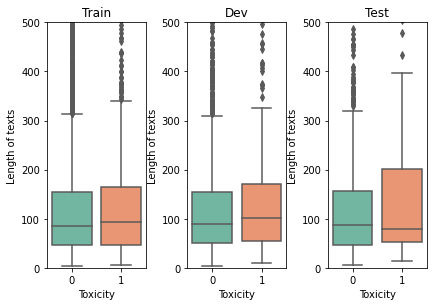

In [4]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


len_train = get_len_set(train_data, label=-1)
len_dev = get_len_set(dev_data, label=-1)
len_test = get_len_set(test_data, label=-1)

fig, axs = plt.subplots(ncols=3)
fig.tight_layout()

ax = sns.boxplot(y=len_train['len_of_texts'], x=len_train['Toxicity'], palette="Set2", ax=axs[0])
ax.set_title("Train")
ax.set_ylabel("Length of texts")
ax.set(ylim=(0,500))
ax = sns.boxplot(y=len_dev['len_of_texts'], x=len_dev['Toxicity'], palette="Set2", ax=axs[1])
ax.set_title("Dev")
ax.set_ylabel("Length of texts")
ax.set(ylim=(0,500))
ax = sns.boxplot(y=len_test['len_of_texts'], x=len_test['Toxicity'], palette="Set2", ax=axs[2])
ax.set_title("Test")
ax.set_ylabel("Length of texts")
ax.set(ylim=(0,500))

[(0.0, 500.0)]

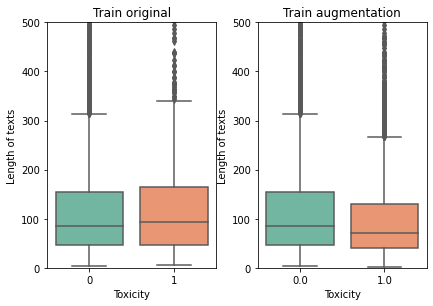

In [5]:
import seaborn as sns
import numpy as np

len_train = get_len_set(train_data, label=-1)
len_train_aug = get_len_set(train_data_aug, label=-1)

fig, axs = plt.subplots(ncols=2)
fig.tight_layout()

ax = sns.boxplot(y=len_train['len_of_texts'], x=len_train['Toxicity'], palette="Set2", ax=axs[0])
ax.set_title("Train original")
ax.set(ylim=(0,500))
ax.set_ylabel("Length of texts")
ax = sns.boxplot(y=len_train_aug['len_of_texts'], x=len_train_aug['Toxicity'], palette="Set2", ax=axs[1])
ax.set_title("Train augmentation")
ax.set_ylabel("Length of texts")
ax.set(ylim=(0,500))

# Wordcloud

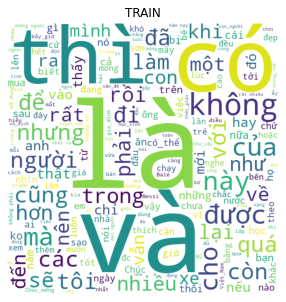

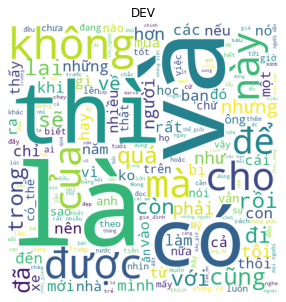

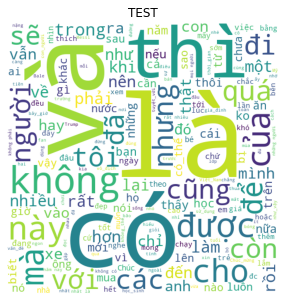

In [6]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

wordcloud_train = make_wordcloud(test_data['Comment'])      
wordcloud_dev = make_wordcloud(dev_data['Comment']) 
wordcloud_test = make_wordcloud(test_data['Comment'])     

# plt.figure(figsize=(8, 8))

fig.add_subplot(3, 3, 1)
plt.imshow(wordcloud_train)
plt.title("TRAIN")
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

plt.imshow(wordcloud_dev)
plt.title("DEV")
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

plt.imshow(wordcloud_test)
plt.title("TEST")
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

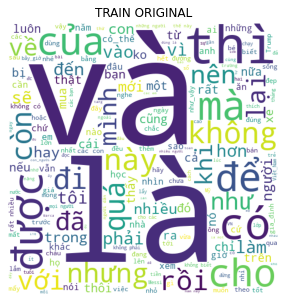

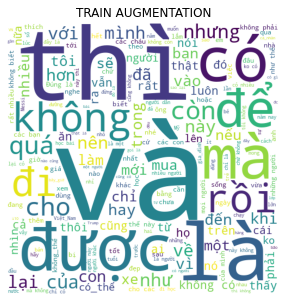

In [7]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

wordcloud_train = make_wordcloud(train_data['Comment'])      
wordcloud_train_aug = make_wordcloud(train_data_aug['Comment'])     

plt.imshow(wordcloud_train)
plt.title("TRAIN ORIGINAL")
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

plt.imshow(wordcloud_train_aug)
plt.title("TRAIN AUGMENTATION")
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()
